In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 차원이 너무 크면 훈련이 느려지고, 좋은 솔루션을 찾기 힘들다
- 중요한 혹은 두 세개의 차원으로 축소하면 시각화에 아주 유용하다
- 차원 축소에 접근하는 방법들
    - 투영
    - 매니폴드
- 차원 축소 기법
    - PCA
    - 커널 PCA
    - LLE

#8.1 차원의 저주

**요약**

- 차원은 신기하다!!
- 고차원 공간에서는 많은 것이 다르게 작동한다..
- **훈련세트의 차원이 클수록 과대적합 위험이 커진다!!**
- 이론적으로는 훈련 샘플의 밀도가 충분히 높아질 때까지 훈련 세트의 크기를 키우면 된다..
    - 근데 차원이 커짐에 따라 필요한 샘플 수가 기하급수적으로 늘어난다
- 그래서 차원 축소가 중요하다!!

#8.2 차원 축소를 위한 접근 방법

##8.2.1 투영

- 많은 특성들(차원들) 중에서도 서로 강하게 연관되어 있는 특성들이 있다..
- 모든 훈련 샘플이 고차원 안의 저차원 **부분 공간**에 놓여 있다..
- 그럼 그 공간에 투영을 시킨다!!
-  항상 최고의 방법은 아니다..
    - **스위스 롤**같이 부분 공간이 뒤틀려있는 경우..

###2차원에 가깝게 배치된 3차원 데이터 셋

**(그림 1)**

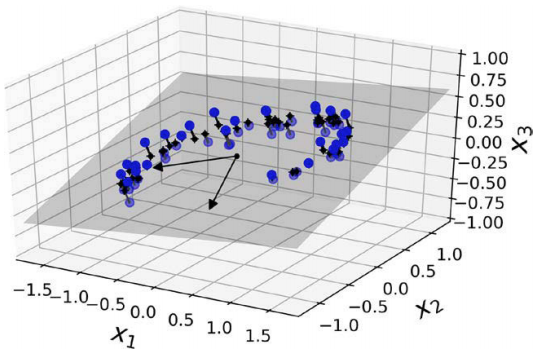

**(그림 2)**

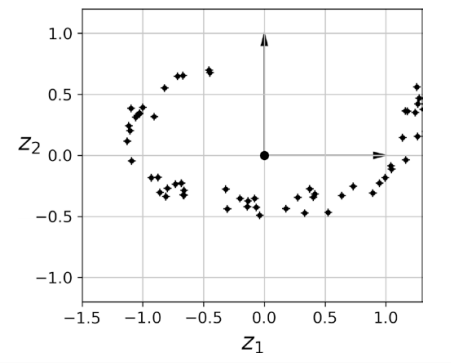

**분석**

- (그림 1)에 파란점들이 3차원 공간에 있지만 평면에(2차원) 가까이 놓여있다
- 그 평면으로 투영시킨 결과가 (그림 2)이다

##8.2.2 매니폴드 학습

###매니폴드 학습

- 대부분의 차원 축소 알고리즘이 **매니폴드**를 모델링하는 식으로 작동함
- **$d$차원 매니폴드**는 국부적으로 $d$차원 초평면으로 보일 수 있는 $n$차원 공간의 일부이다 $(d < n)$
- 고차원 공간에서 휘어지거나 뒤틀린 저차원 모양

####스위스 롤 (2D 매니폴드)

스위스 롤을 가져오자..

In [2]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

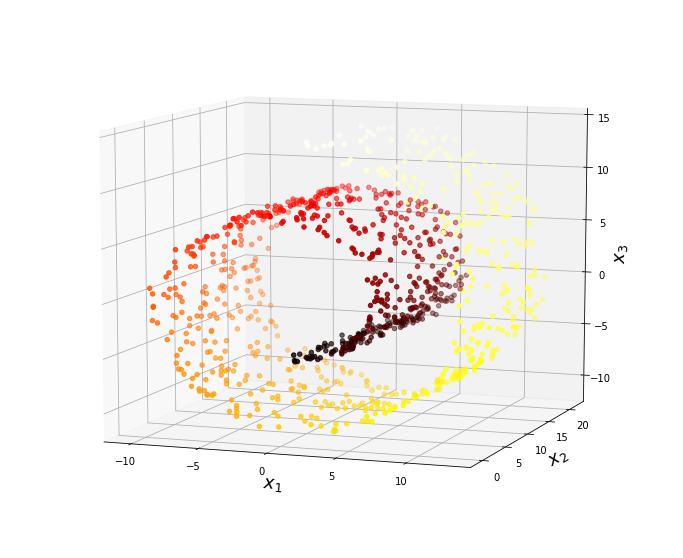

In [3]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

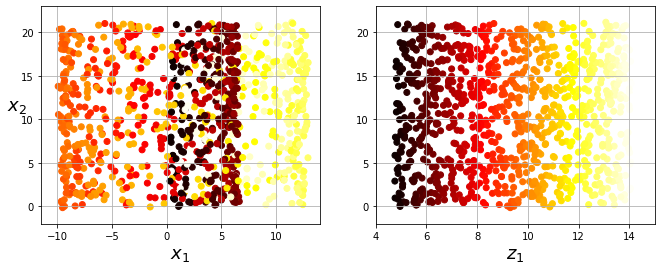

In [4]:
#투영시킨것 과 펼친 것

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

**분석**

- 왼쪽 그림은 그냥 스위스 롤을 $\mathbf{x}_1, \mathbf{x}_2$ 평면으로 투영한 것
- **오른쪽 그림은 스위스 롤을 펼쳐 놓은것..**
    - 우리가 원하는 것!

###매니폴드 가정

- **처리하려는 작업이 저차원의 매니폴드 공간에 표현되면 더 간단해질 것**이라는 가정
- 다만 경험적으로 그런 것이지 항상 유효하지는 않음
- 전적으로 데이터셋에 달림

그림 1


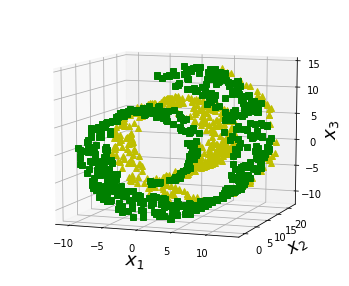

그림 2


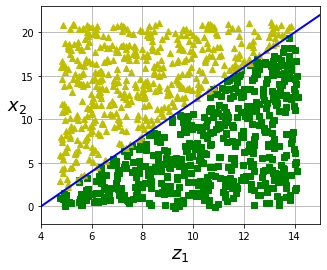

그림 3


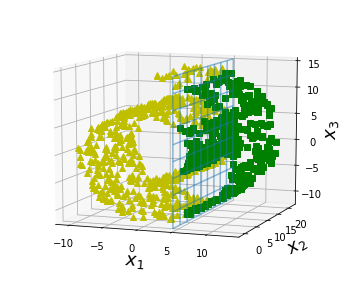

그림 4


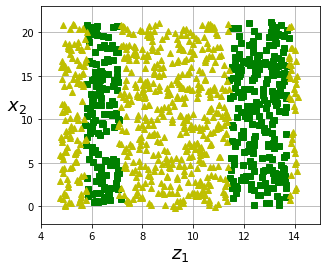

In [5]:
from matplotlib import gridspec

axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

#1번째 그림
print("그림 1")
fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = 2 * (t[:] - 4) > X[:, 1]
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

#2번째 그림
print("그림 2")
fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()

#3번째 그림
print("그림 3")
fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = X[:, 0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

#4번째 그림
print("그림 4")
fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()

**분석**

- 그림 1, 그림 2
    - 매니폴드 가정이 유효함
    - 그림 2에서 그림 1보다 분류가 훨씬 수월함..
- 그림 3, 그림4
    - 매니폴드 가정이 유효하지 않은 경우
    - 그림 3은 평면하나로 분류되는데, 그림 4는 4개의 직선이 필요함..

#8.3 PCA

- 데이터에 가장 가까운 초평면을 정의하고, 거기에 데이터를 투영시킨다

##8.3.1 분산 보존

- **분산이 최대한 보존되도록 축을 선택하는 것이 가장 합리적이다**
- 즉, 원본과 투영된 것 사이의 MSE가 최소가 되는 축을 찾아라..
    - 그럼 정보가 가장 적게 손실된 것!!

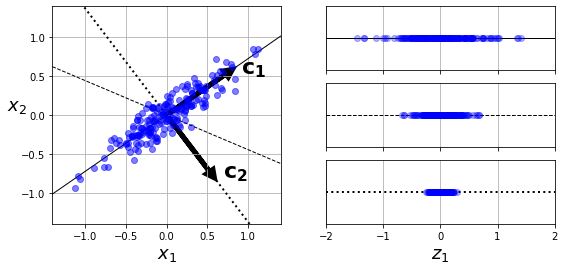

In [6]:
angle = np.pi / 5       #36도
stretch = 5
m = 200

np.random.seed(3)
# X는 -0.1 ~ 0.1의 난수 (m,2)크기..
X = np.random.randn(m, 2) / 10
# 행렬 곱을 이용해서 index=0인 열만 5배로 늘렸다
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
# 그리고 회전시켰다..
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

#3가지 방향의 단위벡터.. 다 크기는 (2,)
u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

#X를 세가지 방향으로....
#행렬 곱을 위해서 u1,u2,u3의 shape을 2차원으로 바꿔줬다..
X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

#그림..
plt.figure(figsize=(9,4))

#rowspan으로 오른쪽 그림을 3개로 나눈다..?
plt.subplot2grid((3,2), (0, 0), rowspan=3)
#방향벡터를 이용해서 세가지 방향의 직선을 그림..  
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
#데이터 찍기
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
#기타 주석..
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

#분산을 잘 보존하는 쪽으로의 투영결과..
plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

#그다음 잘 보존하는 방향..
plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

#제일 보존을 못했다..
plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

**분석**

- 저차원으로 투영하기 전에, 분산을 제일 잘 나타내는 저차원의 초평면을 찾아야한다..
- 여기서는 $c_1$방향이 가장 잘 보존한다..

##8.3.2 주성분

- 3차원 데이터 셋을 2차원으로 차원축소한다

- 여러 주성분들을 찾아나갈 때 규칙이 있다..
- **분산을 최대한 보존**하는 축을 찾아나가되, 앞서 **찾은 주성분들과 직교**해야 한다
- PCA로 찾았을 때 축 자체에만 집중한다..(반대방향의 주성분 벡터가 나올 수도 있다)

**특잇값 분해(SVD)**
- 
$
X = \mathbf{U}\sum\mathbf{V}^T
$

- $
X : (m * n), \mathbf{U} : (m * m), \sum : (m * n), \mathbf{V}^T : (n * n)
$

- $V$행렬의 열에 모든 주성분의 단위벡터가 담겨있다..

- 넘파이의 svd()함수를 쓰면 $V^T$를 반환한다


In [7]:
#3차원의 데이터 셋 준비..

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [8]:
# PCA는 데이터 셋의 평균이 0이라고 가정한다..

X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
#1,2 번째 주성분..
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [9]:
print(Vt.T)

[[ 0.93636116 -0.34027485 -0.08626012]
 [ 0.29854881  0.90119108 -0.31420255]
 [ 0.18465208  0.2684542   0.94542898]]


In [10]:
print(X_centered.shape)
print(U.shape)
print(s.shape)
print(Vt.shape)

(60, 3)
(60, 60)
(3,)
(3, 3)


##8.3.3 d차원으로 투영하기

- 주성분을 추출했으면 처음 $d$개의 주성분으로 정의한 초평면에 투영해서 데이터셋을 $d$차원으로 축소할 수 있다..
    - 분산이 최대가 되도록 뽑았다..

**$d$차원으로 투영하기**

- $
\mathbf{X}_{d-proj} = \mathbf{X}\mathbf{W}_d
$
- 여기서 $\mathbf{W}_d$는 $\mathbf{V}$의 첫 $d$개의 열로 구성된 행렬

In [11]:
#주성분으로 정의된 평면에 투영..

W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [12]:
X.shape, X2D.shape

((60, 3), (60, 2))

##8.3.4 사이킷런 사용하기

- 사이킷런의 PCA 모델을 사용할 수도 있다..
- 얘는 알아서 데이터셋의 평균을 0으로 만들어 준다

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)     #축소할 차원 지정
X2D = pca.fit_transform(X)

components_속성에 $\mathbf{X}^d$의 전치행렬이 담겨 있다

In [14]:
#PCA모듈로 학습..

print(pca.components_.T)

[[-0.93636116  0.34027485]
 [-0.29854881 -0.90119108]
 [-0.18465208 -0.2684542 ]]


In [15]:
#SVD()메서드로 학습..

print(Vt.T)

[[ 0.93636116 -0.34027485 -0.08626012]
 [ 0.29854881  0.90119108 -0.31420255]
 [ 0.18465208  0.2684542   0.94542898]]


**설명**

- 위의 svd()메서드를 바로 쓴 것과 방향만 다른 주성분이 학습된 것을 알 수 있다..

##8.3.5 설명된 분산의 비율

**설명된 분산의 비율**

- 주성분이 얼마나 분산을 잘 보존했는가를 나타내줌..

In [16]:
#1번째 주성분은 84%, 2번째 주성분은 14%정도..

pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

**복원도 가능..**

- inverse_transform() 메서드 사용

In [17]:
#2차원을 3차원으로 복원..

X3D_inv = pca.inverse_transform(X2D)

In [18]:
#완전히 같지는 않다..

np.allclose(X3D_inv, X)

False

**재구성 오차**

- 복원 시에 생기는 원본과의 오차..

In [19]:
#axis = 1이면 행의 방향.. 이방향으로 찌부시키는 방향으로 계산..

np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.010170337792848549

##8.3.6 적절한 차원 수 선택하기

- 여기서부터는 MNIST데이터의 차원(784)을 차원축소한다

In [20]:
#데이터 준비..

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [21]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

####방법 1) 차원축소 없이 모든 설명된 분산을 계산한 뒤에 다시 필요한 차원수를 계산

- np.cumsum()메서드
    - 누적합을 계산..
    - ex) np.cumsum([1, 2, 3, 4, 5]) = [1, 3, 6, 10, 15]

In [22]:
pca = PCA()
pca.fit(X_train)

#누적비율 계산
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

print(d)

154


**차원 수에 대한 설명된 분산**

- 설명된 분산의 빠른 증가가 멈추는 변곡점이 있다..

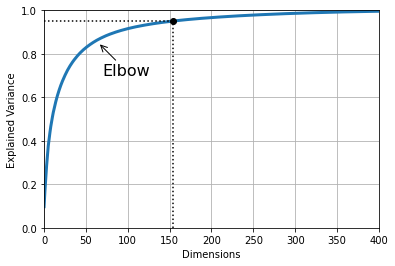

In [23]:
plt.figure(figsize=(6,4))

#누적합을 그래프로..
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)

plt.show()

####방법 2) PCA()모델에 설명된 분산의 비율을 전달해준다

- 이게 훨씬 편하다..

In [24]:
#바로 비율 전달..

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [25]:
#뽑힌 차원수..

pca.n_components_

154

In [26]:
#설명된 분산의 합..

np.sum(pca.explained_variance_ratio_)

0.9503684424557437

##8.3.7 압축을 위한 PCA

- MNIST 데이터셋이 PCA를 통해 95%의 분산을 유지한채 데이터셋의 크기는 축소되었다..
- 이렇게 압축하면 속도 면에서 상당한 이득이다..
- 앞에서 했듯 복원도 할 수 있다..
- **재구성 오차**는 있다..

In [27]:
#훈련하고 복원했다..

pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

**복원한 것을 그려보자**

$
\mathbf{X}_{recovered} = \mathbf{X}_{d-proj}\mathbf{W}_d^T
$

- $(m * n) = (m * d) * (d * n)$

In [28]:
#5개씩 그림그리는 함수
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = 'binary', **options)
    plt.axis("off")

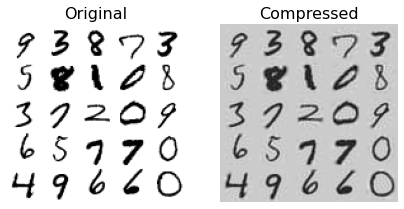

In [29]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

plt.show()

##8.3.8 랜덤 PCA

- svd_solver 매개변수
    - "randomized" : 랜덤 PCA
    - "auto"
        - m이나 n이 500보다 크거나
        - d가 m이나 n의 80%보다 작을 때..는 자동 랜덤 PCA..
    - "full"
        - 완전한 SVD로 강제
- 확률적 알고리즘을 사용해 처음 $d$개의 주성분의 근삿값을 찾는다
- 완전 SVD : $O(m * n^2) + O(n^3)$
- 랜덤 PCA : $O(m * d^2) + O(d^3)$

-> $d << n$ 이면 시간이 훨씬 빨라진다!!

In [30]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)

##8.3.9 점진적 PCA

- 훈련세트가 너무 클때 유용하다
- 온라인으로 PCA 적용 가능..
- partial_fit()을 호출해야함..


####사이킷런의 IncrementalPCA 클래스 사용

In [31]:
#점진적 PCA로 차원 축소..

from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

In [32]:
#데이터 복원

X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

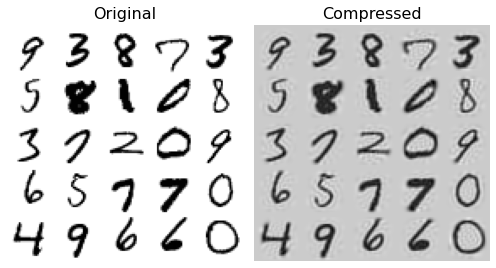

In [33]:
#복원 및 그림..

plt.figure(figsize=(7,4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)

plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.tight_layout()

plt.show()

####memmap() 사용

- 매우 큰 배열을 메모리에 들어있는 것처럼 다룬다...

memmap() 구조를 만들고 MNIST데이터를 복사.. 일반적으로는 별도의 프로그램에서 먼저 수행됨..

In [34]:
filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

데이터가 디스크에 저장되었는지 확인하기 위해 memmap() 객체를 삭제..

In [35]:
del X_mm

다른 프로그램에서 데이터를 로드하여 훈련데 사용..

In [36]:
#데이터 로드..
X_mm = np.memmap(filename, dtype='float32', mode="readonly", shape=(m, n))

#n_batches = 100
#한번 불러서 fit할 때 마다 batch_size개 만큼 fit하겟다..
batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, copy=True, n_components=154, whiten=False)

##시간 복잡도

- 완전 SVD : $O(m * n^2) + O(n^3)$
- 랜덤 PCA : $O(m * d^2) + O(d^3)$

-> $d << n$ 이면 시간이 훨씬 빨라진다!!

###주성분 갯수를 바꿔가면서 일반, 랜덤, 점진적 PCA의 시간을 비교

In [37]:
import time

for n_components in (2, 10, 154):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components, svd_solver="full")     #완전 svd로 고정
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500) #점진적 PCA
    rnd_pca = PCA(n_components=n_components, svd_solver="randomized")   #랜덤 PCA

    for pca in (inc_pca, regular_pca, rnd_pca):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print("     {}: {:.1f} 초".format(pca.__class__.__name__, t2 - t1))

n_components = 2
     IncrementalPCA: 20.7 초
     PCA: 10.7 초
     PCA: 3.6 초
n_components = 10
     IncrementalPCA: 21.7 초
     PCA: 10.4 초
     PCA: 4.0 초
n_components = 154
     IncrementalPCA: 32.3 초
     PCA: 10.3 초
     PCA: 7.8 초


**분석**

- 시간이 랜덤 - 일반 - 점진적 PCA순으로 빠르다
- 랜덤-일반 사이의 차이는 n_components가 커질수록 점점 줄어든다..
    - 위의 설명 참고..
- 점진적 PCA는 그냥 점점 늘어난다..

###데이터셋(샘플 수)의 크기를 바꿔가면서 일반, 랜덤 PCA 비교

- 좀 이상하네..

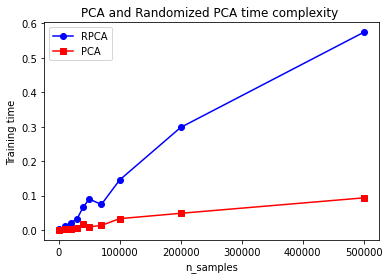

In [38]:
#시간을 저장할 리스트..
times_rpca = []     #랜덤..
times_pca = []      #완전..

#확인할 테이터 셋의 크기..
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)   #특성은 5개로 고정

    #랜덤 PCA 만들어서 시간 측정후 저장
    pca = PCA(n_components=2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)

    #일반 PCA 만들어서 시간 측정후 저장
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

#그림 그리기!!
plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

plt.show()

**분석**

- 샘플 수가 증가할 때 랜덤 PCA가 일반 PCA보다 더 급하게 훈련시간이 늘어난다..
- 좀 이해는 안되네..

###특성의 개수를 바꿔가면서 일반, 랜덤 PCA 비교

- 데이터 셋 크기를 2000개 고정
- 2차원으로 축소도 고정..

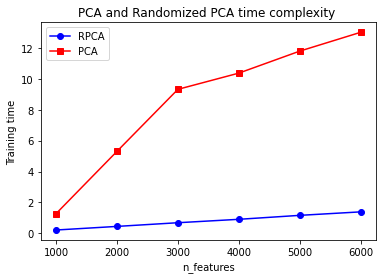

In [39]:
#시간을 측정 후 저장할 리스트..
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]

for n_features in sizes:
    X = np.random.randn(2000, n_features)   #크기는 2000으로 고정, 특성 변화

    #랜덤 PCA생성, 훈련, 시간 측정후 저장
    pca = PCA(n_components=2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)

    #일반 PCA생성, 훈련, 시간 측정후 저장
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

#그래프 그리기..
plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

plt.show()

**분석**

- 특성이 많아질수록 랜덤이 확실히 빠르다..
- 시간복잡도 때문에 그럼..

#8.4 커널 PCA

- 5장의 커널트릭을 PCA에 적용.. -> 같은 방식으로 복잡한 비선형 투형을 수행가능
- 여러 커널을 적용가능.. (선형 커널, rbf 커널, 시그모이드 커널)
- kPCA자체는 비지도 학습..
    - 레이블이 없음!

####여러가지 커널의 kPCA를 이용해서 2D로 축소된 스위스 롤

In [40]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [41]:
#얘는 rbf커널..
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.4)
X_reduced = rbf_pca.fit_transform(X)

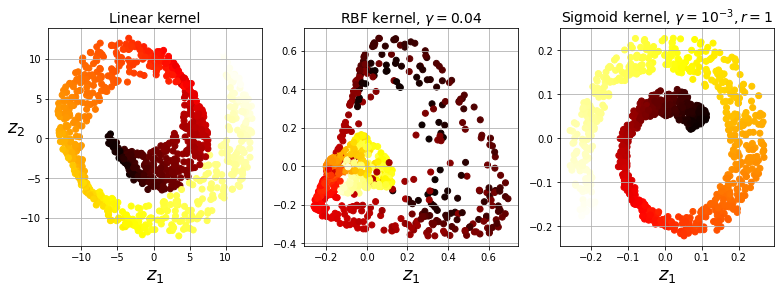

In [42]:
from sklearn.decomposition import KernelPCA

#선형, rbf, 시그모이드 커널을 사용한 kPCA모델.. 재구성 모두 가능하도록 지정
lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

#후의 로지스틱회귀를 위한 레이블 설정..
y = t > 6.9

plt.figure(figsize=(13, 4))
#각 모델마다 차원 축소시켜서 그래프 그림..
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    #나중을 위해 따로 rbf커널만 저장
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

##8.4.1 커널 선택과 하이퍼파라미터 튜닝

- kPCA 자체는 비지도 학습
- 종종 지도학습의 전처리 단계로 활용됨
- 따라서 그리드 탐색으로 주어진 문제에서 최고의 커널 및 하이퍼파라미터를 선택가능..

###차원축소 후 로지스틱회귀

- 그리드 서치로 성능이 가장 좋은 특성을 찾자..
- 재구성 오차가 최소가 되도록하게 찾을 수도 있다..

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),    #차원축소
        ("log_reg", LogisticRegression())       #로지스틱회귀
])

param_grid = [{
    "kpca__gamma" : np.linspace(0.03, 0.05, 10),
    "kpca__kernel" : ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)   # y = t > 6.9

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                                 

In [44]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


###재구성(복원)하기..

- 선형 PCA보다는 쉽지 않다

**변환 설명**

- 실제 변환은 **특성 맵** $\phi$를 사용해서 훈련세트를 무한 차원의 특성공간(오른쪽 아래)으로 매핑 후 선형 PCA를 사용해서 2D(오른쪽 위)로 투영함..
- 커널 트릭 덕에 그냥 kPCA 변환에서 이득을 본다..


**재구성 설명**

- 축소된 공간(오른쪽 위)의 샘플을 선형 PCA를 역전시키면 재구성된 데이터 포인트는 **특성 공간**(오른쪽 아래)에 놓이게 된다
- 얘는 무한차원이라 계산이 안된다..
- 다행히 이 재구성된 데이터 포인트에 가깝게 매핑된 원본 공간의 포인트를 찾을 수 있다..
- 이걸 **재구성 원상**이라고 함..
- 이 재구성 원상과 원본 데이터의 오차를 **재구성 원상 오차**라고 함..

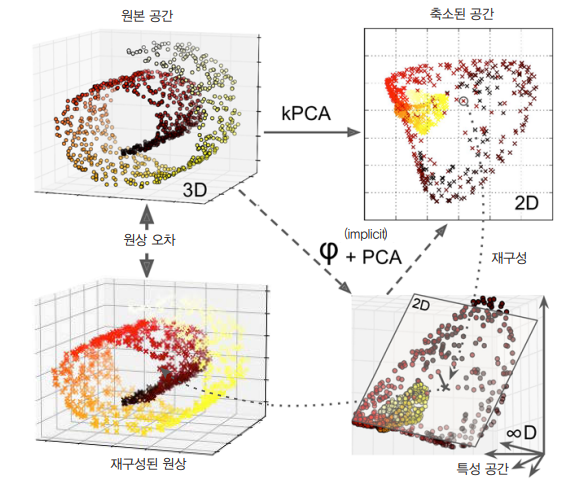

**재구성 방법**

- 투영된 샘플을 훈련세트로, 원본을 타깃으로 해서 지도학습을 함
- 모델 생성 시 fit_inverse_transform 매개변수를 True로 지정해 줘야함

X의 재구성 원상


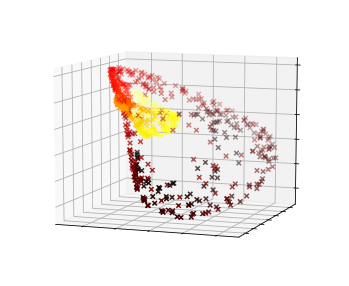

In [45]:
print("X의 재구성 원상")
plt.figure(figsize=(6, 5))

#아까 fit_inverse_transform=True로 지정함..
X_inverse = rbf_pca.inverse_transform(X_reduced_rbf)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, cmap=plt.cm.hot, marker="x")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

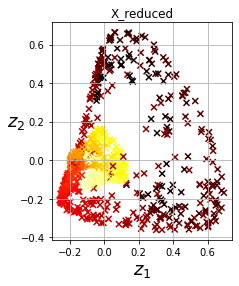

In [46]:
#차원축소된 X를 그래프로..

X_reduced = rbf_pca.fit_transform(X)

plt.figure(figsize=(11, 4))
plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker="x")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.title("X_reduced")
plt.show()

**앞서 구한 최고의 하이퍼파라미터로 학습 후 재구성 오차 계산**

In [47]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [48]:
from sklearn.metrics import mean_squared_error

#재구성 오차..
mean_squared_error(X, X_preimage)

32.78630879576613

#8.5 LLE

**지역 선형 임베딩**

- 또 다른 강력한 **비선형 차원 축소** 기법
- 투영에 의존하지 않는 매니폴드 학습..
- 잡음이 많지 않으면 꼬인 매니폴드를 펼치는 데에 좋다..

###LLE 작동 방식



####1) 각 훈련 샘플이 가장 가까운 이웃에 얼마나 선형적으로 연관되어 있는지 측정

- 지역관계 모델링
- $
\hat{W} = argmin\sum\limits_{i=1}^m(\mathbf{x}^{(i)} - \sum\limits_{j=1}^mw_{i,j}\mathbf{x}^{(j)})^2
$

- [조건]  $
\begin{cases}
w_{i,j} = 0 & \mathbf{x}^{(j)}가 \mathbf{x}^{(i)}\text{의 최근접이웃 k개 중 하나가 아닐때}
 \\
\sum\limits_{j=1}^mw_{i,j} = 1 & i = 1,2,,,m 일때
\end{cases}
$

- **샘플($x^{(i)}$)을 고정하고 최적의 가중치($\hat{W}$)를 찾는 과정**

####2) 국부적인 관계가 가장 잘 보존되는 훈련 세트의 저차원 표현을 찾음

- 관계를 보존하도록 $d$차원 공간으로 축소 ($d < n)$
- 즉, $\mathbf{z}^{(i)}$가 $d$차원 공간에서 $\mathbf{x}^{(i)}$의 image이면 가능한 $\mathbf{z}^{(i)}$와 $\sum\limits_{j=1}^mw_{i,j}\mathbf{z}^{(j)}$의 거리가 최소화되어야 함
- 즉, 아래와 같은 제약이 없는 최적화 문제가 됨
- $
Z = argmin\sum\limits_{i=1}^m(\mathbf{z}^{(i)} - \sum\limits_{j=1}^mw_{i,j}\mathbf{z}^{(j)})^2
$
- **가중치를 고정하고 저차원의 공간에서 샘플이미지의 최적위치를 찾는 과정**

###LLE 시간복잡도

1) 최근접 이웃 k개를 찾는 시간

- $O(m*log(m)*nlog(k))$

2) 가중치 최적화 시간

- $O(mnk^3)$

3) 저차원 표현을 만드는 시간

- $O(dm^2)$
- 여기의 $m^2$때문에 샘플이 많으면 엄청 느려진다..

###LLE 코딩

In [49]:
#데이터 준비..

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [50]:
from sklearn.manifold import LocallyLinearEmbedding

#2차원으로 축소하고, 근접이웃 10개를 보겠다..
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

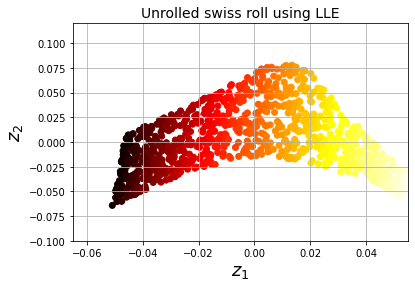

In [51]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()

**분석**

- 스위스 롤이 잘 펼쳐졌다
- 지역적으로 샘플 간 거리가 잘 보존됨
- 크게 보면 샘플 간 거리가 잘 유지가 안 됐다!
    - 원래는 왼쪽과 오른쪽의 두께가 비슷했다..
    - p.278의 그림 8-5의 오른쪽 펼친 그림을 참조..
    - 지금은 압축된 정도가 달라졌다!!
    - 그래도 모델링 잘된다..

#8.6 다른 차원 축소 기법

####랜덤 투영

- 랜덤한 선형 투영을 사용..
- 실제로 거리를 잘 보존함.. 수학적 증명..
- 차원 축소 품질은 **샘플 수와 목표 차원수**에 따라 다름
- **초기 차원수에는 관계없다!!**

#### 다차원 스케일링 (MDS)

- 샘플 간의 거리를 보존하면서 차원을 축소

####Isomap

- 각 샘플을 가장 가까운 이웃과 연결하는 식으로 그래프를 만든다
- 샘플 간의 **지오데식 거리**를 유지하며 차원 축소..
    - 지오데식 거리 : 그래프에서 두 노드 사이의 최단 경로를 이루는 노드의 수..

####t-SNE

- 비슷한 샘플은 가까이, 비슷하지 않은 샘플은 멀리 떨어지도록 차원을 축소..
- **시각화**에 많이 사용
- 고차원 공간에 있는 **샘플의 군집을 시각화**할 때 사용..
    - ex) MNIST 셋을 2D로 시각화

####선형 판별 분석 (LDA)

- 사실 분류 알고리즘
- 훈련 과정에서 클래스 사이를 가장 잘 구분하는 축을 학습..
- 장점
    - 투영을 통해 가능한 한 클래스를 멀리 떨어지게 유지시킴
    - 그래서 다른 분류 알고리즘을 적용하기 전 차원 축소에 좋다..

####코딩 및 그래프..

#####스위스 롤의 차원 축소..

In [52]:
#MDS
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

In [53]:
#Isomap
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [54]:
#t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

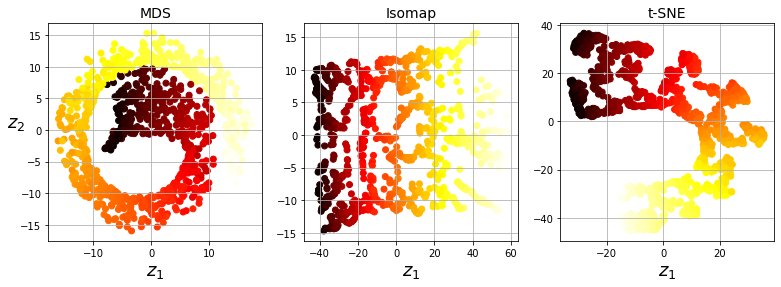

In [55]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(13,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:,0], X_reduced[:,1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

#####MNIST 데이터셋을 LDA로 차원축소..

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

In [57]:
X_reduced_lda.shape

(70000, 2)

#8.7 연습문제

##9번

- MNIST 데이터 셋을 훈련세트와 테스트세트로 분할
- 이 데이터로 랜덤 포레스트 분류기를 훈련 및 시간 측정
- 테스트 세트로 모델 평가
- PCA로 설명된 분산을 95%로 해서 차원 축소..
- 축소된 데이터 셋으로 랜덤 포레스트 훈련 및 시간 측정
- 테스트 세트로 모델 평가..
- 시간 및 성능 비교..

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [62]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [63]:
#훈련 / 테스트 세트 분할

X = mnist["data"]
y = mnist["target"]

X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [64]:
#랜덤 포레스트 분류기 훈련 및 시간 측정..

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(max_depth=3, n_jobs=-1)
t1 = time.time()
rnd_clf.fit(X_train, y_train)
t2 = time.time()

print("차원 축소 전 훈련 시간은 {:.1f}초 입니다".format(t2-t1))

차원 축소 전 훈련 시간은 6.2초 입니다


In [69]:
#성능 확인..

from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.7579


In [66]:
#차원 축소.. 95%의 분산 보존

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
rnd_clf_reduced = RandomForestClassifier(max_depth=3, n_jobs=-1)
X_reduced = pca.fit_transform(X_train)

In [67]:
#랜덤 포레스트 분류기 훈련 및 시간 측정

t1 = time.time()
rnd_clf_reduced.fit(X_reduced, y_train)
t2 = time.time()

print("차원 축소 후 훈련 시간은 {:.1f}초 입니다".format(t2-t1))

차원 축소 후 훈련 시간은 19.0초 입니다


In [70]:
#테스트 세트 변환 후 성능 확인..

X_test_reduced = pca.transform(X_test)

y_pred_reduced = rnd_clf_reduced.predict(X_test_reduced)

print(accuracy_score(y_test, y_pred_reduced))

0.762


**결론**

- 차원축소가 늘 훈련 시간을 줄여주는 것은 아니다..
    - 축소 전 훈련 : 5.8초
    - 축소 후 훈련 : 19.0초
    - 축소 전 성능 : 
- 원래 성능은 조금 줄어야함..
- p.280의 그림 8-6 참조..